Метод главных компонент (PCA, Principal Component Analysis) — это техника снижения размерности, которая используется для преобразования данных с высокой размерностью в данные с меньшим числом измерений при сохранении как можно большего количества информации. PCA находит новые переменные, называемые главными компонентами, которые представляют собой линейные комбинации исходных переменных. Эти компоненты упорядочены по убыванию дисперсии данных, которую они объясняют.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import seaborn as sns

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

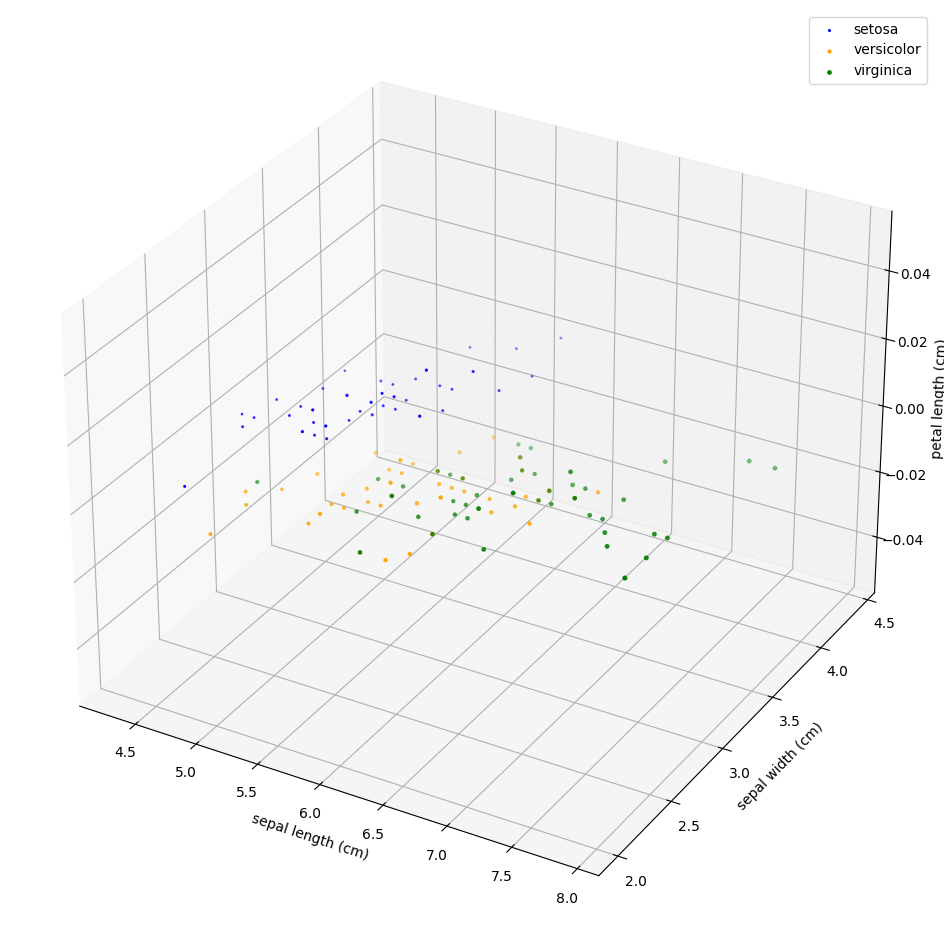

In [4]:
from mpl_toolkits.mplot3d import Axes3D
colors = ["blue", "orange", "green"]
fig = plt.figure(figsize=(12, 12))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], X[y == i,2], c=colors[i], label=iris.target_names[i])
axis.set_xlabel(iris.feature_names[0], fontsize=10)
axis.set_ylabel(iris.feature_names[1], fontsize=10)
axis.set_zlabel(iris.feature_names[2], fontsize=10)
plt.legend()

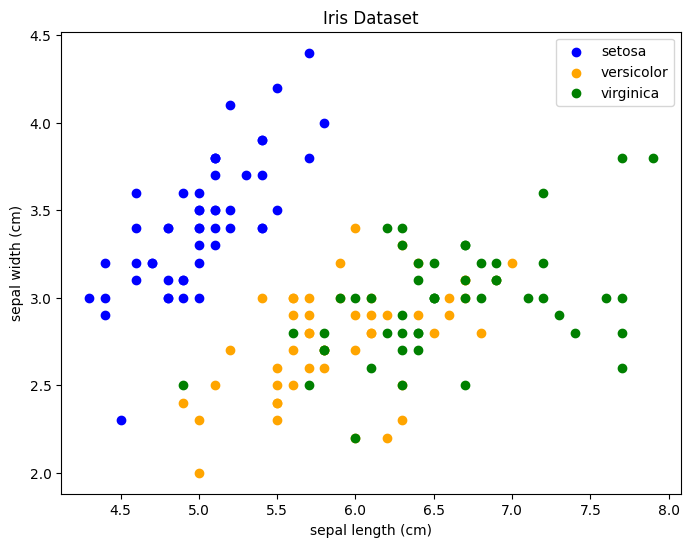

In [5]:
colors = ["blue", "orange", "green"]
plt.figure(figsize=(8, 6))
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=colors[i], label=iris.target_names[i])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.title('Iris Dataset')
plt.show()

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

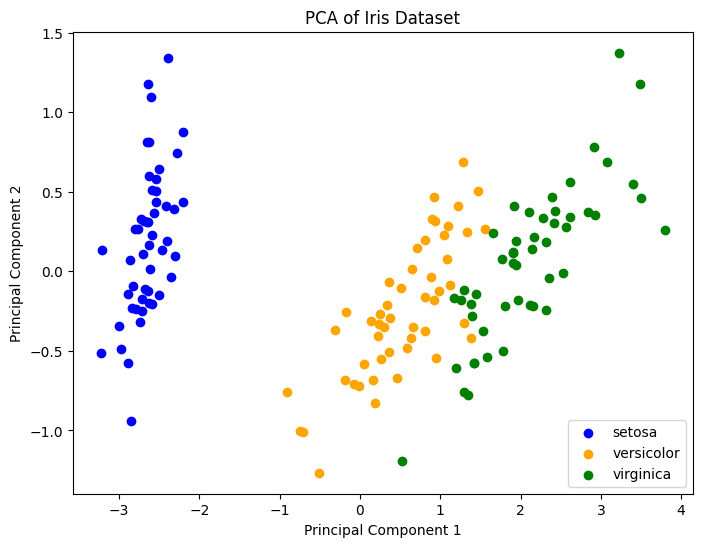

Meaning of the 2 components:
0.36 x sepal length (cm) + -0.08 x sepal width (cm) + 0.86 x petal length (cm) + 0.36 x petal width (cm)
0.66 x sepal length (cm) + 0.73 x sepal width (cm) + -0.17 x petal length (cm) + -0.08 x petal width (cm)


In [7]:
colors = ["blue", "orange", "green"]
plt.figure(figsize=(8, 6))
for i in np.unique(y):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=colors[i], label=iris.target_names[i])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Iris Dataset')
plt.show()

print("Meaning of the 2 components:")
for component in pca.components_: 
    print(" + ".join("%.2f x %s" % (value, name) 
                     for value, name in zip(component, iris.feature_names)))

Попробуем обучить KNN для двух наборов данных Iris и Iris PCA

IRIS

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [10]:
predictions = model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.94      0.88      0.91        17
           2       0.78      0.88      0.82         8

    accuracy                           0.93        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.94      0.93      0.93        45



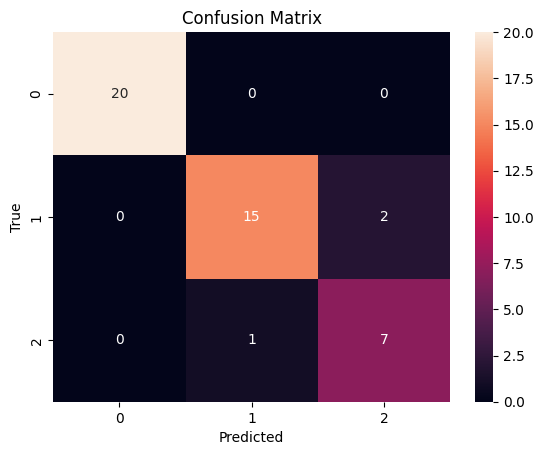

In [11]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, predictions))

IRIS PCA

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [13]:
predictions = model.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      1.00      0.93        14
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



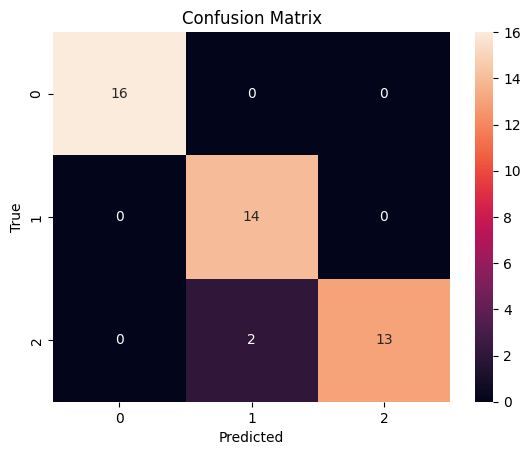

In [14]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, predictions))